In [2]:
# 파일 경로 패턴 정의 및 읽기를 위한 라이브러리
import pandas as pd
import glob
import re

from matplotlib import rc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

연령대별 긍정 - 부정 비율 차이:
20대: -3.3%
30대: -0.2%
40대: -1.8%
50대: -1.6%
60대: 6.8%


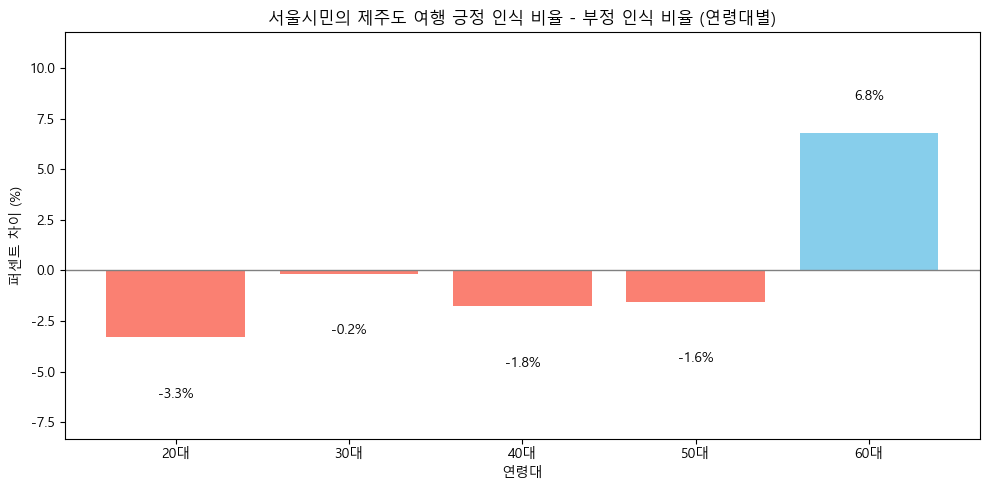

In [10]:
# 파일 불러오기
neg_df = pd.read_csv("C:/Users/hantj/data/combined_df.csv", encoding='utf-8')
pos_df = pd.read_csv("C:/Users/hantj/data/3. interpolation_df.csv", encoding='utf-8')

# 필터링 조건 정의
metro_areas = ['서울특별시']
income_exclude = '700만원 이상'

# 부정 그룹: JEJU 1~3
neg_filtered = neg_df[
    (neg_df['AREA'].isin(metro_areas)) &
    (neg_df['INCOME'] != income_exclude) &
    (neg_df['JEJU'].isin([1, 2, 3]))
]

# 긍정 그룹: JEJU 4~5
pos_filtered = pos_df[
    (pos_df['AREA'].isin(metro_areas)) &
    (pos_df['INCOME'] != income_exclude) &
    (pos_df['JEJU'].isin([4, 5]))
]

# 연령대 목록
age_groups = ['20대', '30대', '40대', '50대', '60대']

# 연령대별 퍼센트 계산
total_neg = len(neg_filtered)
total_pos = len(pos_filtered)

neg_ratio = {age: neg_filtered['AGE'].value_counts().get(age, 0) / total_neg * 100 for age in age_groups}
pos_ratio = {age: pos_filtered['AGE'].value_counts().get(age, 0) / total_pos * 100 for age in age_groups}

# 퍼센트 차이 계산
diff_ratio = {age: pos_ratio[age] - neg_ratio[age] for age in age_groups}

# 출력
print("연령대별 긍정 - 부정 비율 차이:")
for age in age_groups:
    print(f"{age}: {diff_ratio[age]:.1f}%")

# 시각화
plt.figure(figsize=(10, 5))
bars = plt.bar(diff_ratio.keys(), diff_ratio.values(),
               color=['skyblue' if v >= 0 else 'salmon' for v in diff_ratio.values()])
plt.axhline(0, color='gray', linewidth=1)
plt.title("서울시민의 제주도 여행 긍정 인식 비율 - 부정 인식 비율 (연령대별)")
plt.ylabel("퍼센트 차이 (%)")
plt.xlabel("연령대")

plt.ylim(min(diff_ratio.values()) - 5, max(diff_ratio.values()) + 5)  # 여백 추가

for bar in bars:
    height = bar.get_height()
    if height >= 0:
        plt.text(bar.get_x() + bar.get_width() / 2,
                 height + 1.5,
                 f"{height:.1f}%",
                 ha='center',
                 va='bottom')
    else:
        plt.text(bar.get_x() + bar.get_width() / 2,
                 height - 2.5,
                 f"{height:.1f}%",
                 ha='center',
                 va='top')

plt.rcParams['axes.unicode_minus'] = False
plt.tight_layout()
plt.show()


성별 긍정 - 부정 비율 차이:
M: -10.0%
F: 10.0%


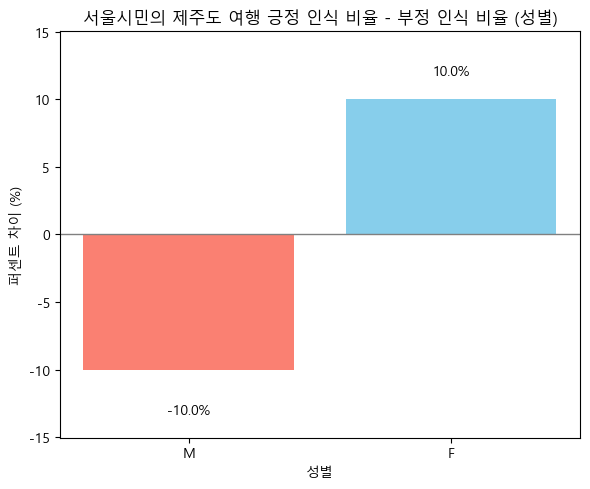

In [11]:
# 필터링 조건
metro_areas = ['서울특별시']
income_exclude = '700만원 이상'

# 부정 그룹: JEJU 1~3
neg_filtered = neg_df[
    (neg_df['AREA'].isin(metro_areas)) &
    (neg_df['INCOME'] != income_exclude) &
    (neg_df['JEJU'].isin([1, 2, 3]))
]

# 긍정 그룹: JEJU 4~5
pos_filtered = pos_df[
    (pos_df['AREA'].isin(metro_areas)) &
    (pos_df['INCOME'] != income_exclude) &
    (pos_df['JEJU'].isin([4, 5]))
]

# 성별 목록 (데이터에 따라 'M', 'F' 또는 '남', '여' 등 확인 필요)
sex_groups = ['M', 'F']

# 전체 수
total_neg = len(neg_filtered)
total_pos = len(pos_filtered)

# 성별 퍼센트 계산
neg_ratio = {sex: neg_filtered['SEX'].value_counts().get(sex, 0) / total_neg * 100 for sex in sex_groups}
pos_ratio = {sex: pos_filtered['SEX'].value_counts().get(sex, 0) / total_pos * 100 for sex in sex_groups}

# 퍼센트 차이
diff_ratio = {sex: pos_ratio[sex] - neg_ratio[sex] for sex in sex_groups}

# 출력
print("성별 긍정 - 부정 비율 차이:")
for sex in sex_groups:
    print(f"{sex}: {diff_ratio[sex]:.1f}%")

# 시각화
plt.figure(figsize=(6, 5))
bars = plt.bar(diff_ratio.keys(), diff_ratio.values(),
               color=['skyblue' if v >= 0 else 'salmon' for v in diff_ratio.values()])
plt.axhline(0, color='gray', linewidth=1)
plt.title("서울시민의 제주도 여행 긍정 인식 비율 - 부정 인식 비율 (성별)")
plt.ylabel("퍼센트 차이 (%)")
plt.xlabel("성별")

plt.ylim(min(diff_ratio.values()) - 5, max(diff_ratio.values()) + 5)

for bar in bars:
    height = bar.get_height()
    offset = 1.5 if height >= 0 else -2.5
    va = 'bottom' if height >= 0 else 'top'
    plt.text(bar.get_x() + bar.get_width() / 2,
             height + offset,
             f"{height:.1f}%",
             ha='center', va=va)

plt.tight_layout()
plt.show()


소득 구간별 긍정 - 부정 비율 차이:
300만원 미만: -0.4%
300이상500만원 미만: -1.9%
500이상700만원 미만: 2.3%


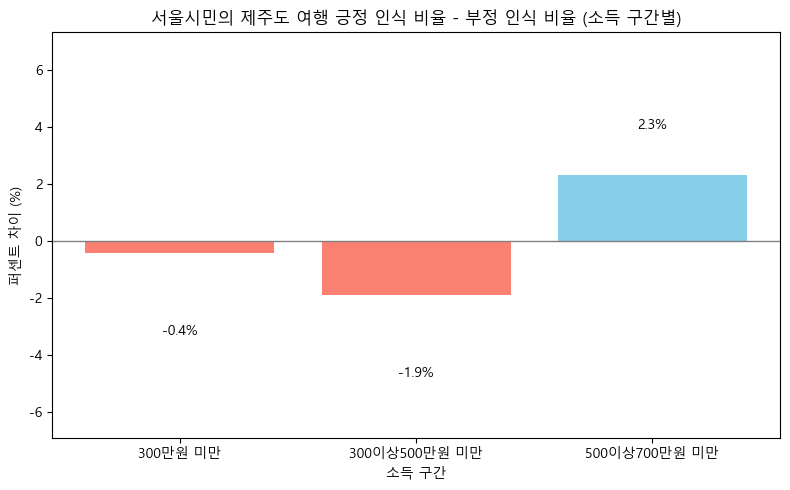

In [12]:
# 필터링 조건
metro_areas = ['서울특별시']
income_exclude = '700만원 이상'

# 부정 그룹: JEJU 1~3
neg_filtered = neg_df[
    (neg_df['AREA'].isin(metro_areas)) &
    (neg_df['INCOME'] != income_exclude) &
    (neg_df['JEJU'].isin([1, 2, 3]))]
neg_filtered = neg_filtered[neg_filtered['INCOME'] != '모름']  # :왼쪽을_가리키는_손_모양: 요기!

# 긍정 그룹: JEJU 4~5
pos_filtered = pos_df[
    (pos_df['AREA'].isin(metro_areas)) &
    (pos_df['INCOME'] != income_exclude) &
    (pos_df['JEJU'].isin([4, 5]))]
# 이후 그대로 진행

# 소득 구간 순서
income_groups = ['300만원 미만', '300이상500만원 미만', '500이상700만원 미만']
# 전체 수
total_neg = len(neg_filtered)
total_pos = len(pos_filtered)
# 소득 비율 계산
neg_ratio = {income: neg_filtered['INCOME'].value_counts().get(income, 0) / total_neg * 100 for income in income_groups}
pos_ratio = {income: pos_filtered['INCOME'].value_counts().get(income, 0) / total_pos * 100 for income in income_groups}
# 퍼센트 차이 계산
diff_ratio = {income: pos_ratio[income] - neg_ratio[income] for income in income_groups}
# 출력
print("소득 구간별 긍정 - 부정 비율 차이:")
for income in income_groups:
    print(f"{income}: {diff_ratio[income]:.1f}%")
# 시각화
plt.figure(figsize=(8, 5))
bars = plt.bar(diff_ratio.keys(), diff_ratio.values(),
               color=['skyblue' if v >= 0 else 'salmon' for v in diff_ratio.values()])
plt.axhline(0, color='gray', linewidth=1)
plt.title("서울시민의 제주도 여행 긍정 인식 비율 - 부정 인식 비율 (소득 구간별)")
plt.ylabel("퍼센트 차이 (%)")
plt.xlabel("소득 구간")
plt.ylim(min(diff_ratio.values()) - 5, max(diff_ratio.values()) + 5)
for bar in bars:
    height = bar.get_height()
    offset = 1.5 if height >= 0 else -2.5
    va = 'bottom' if height >= 0 else 'top'
    plt.text(bar.get_x() + bar.get_width() / 2,
             height + offset,
             f"{height:.1f}%",
             ha='center', va=va)
plt.tight_layout()
plt.show()